area           0
perimeter      0
compactness    0
length         0
width          0
asymmetry      0
groove         0
dtype: int64
0
0.857142857143


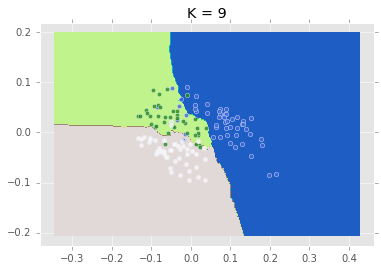

In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline
matplotlib.style.use('ggplot') # Look Pretty


def plotDecisionBoundary(model, X, y):
  fig = plt.figure()
  ax = fig.add_subplot(111)

  padding = 0.6
  resolution = 0.0025
  colors = ['royalblue','forestgreen','ghostwhite']

  # Calculate the boundaris
  x_min, x_max = X[:, 0].min(), X[:, 0].max()
  y_min, y_max = X[:, 1].min(), X[:, 1].max()
  x_range = x_max - x_min
  y_range = y_max - y_min
  x_min -= x_range * padding
  y_min -= y_range * padding
  x_max += x_range * padding
  y_max += y_range * padding

  # Create a 2D Grid Matrix. The values stored in the matrix
  # are the predictions of the class at at said location
  xx, yy = np.meshgrid(np.arange(x_min, x_max, resolution),
                       np.arange(y_min, y_max, resolution))

  # What class does the classifier say?
  Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
  Z = Z.reshape(xx.shape)

  # Plot the contour map
  cs = plt.contourf(xx, yy, Z, cmap=plt.cm.terrain)

  # Plot the test original points as well...
  for label in range(len(np.unique(y))):
    indices = np.where(y == label)
    plt.scatter(X[indices, 0], X[indices, 1], c=colors[label], label=str(label), alpha=0.8)

  p = model.get_params()
  plt.axis('tight')
  plt.title('K = ' + str(p['n_neighbors']))


# 
# TODO: Load up the dataset into a variable called X. Check the .head and
# compare it to the file you loaded in a text editor. Make sure you're
# loading your data properly--don't fail on the 1st step!
#
# .. your code here ..
X = pd.read_csv("datasets/wheat.data")
X.head()

#
# TODO: Copy the 'wheat_type' series slice out of X, and into a series
# called 'y'. Then drop the original 'wheat_type' column from the X
#
# .. your code here ..
y = X['wheat_type']
X.drop(labels = ['id', 'wheat_type'], axis = 1, inplace = True)
# TODO: Do a quick, "ordinal" conversion of 'y'. In actuality our
# classification isn't ordinal, but just as an experiment...
#
# .. your code here ..
y = y.astype("category").cat.codes


#
# TODO: Basic nan munging. Fill each row's nans with the mean of the feature
#
# .. your code here ..
X.compactness.fillna(X.compactness.mean(), inplace = True)
X.width.fillna(X.width.mean(), inplace = True)
X.groove.fillna(X.groove.mean(), inplace = True)
print X.isnull().sum() # No more missing values!
print y.isnull().sum() # Has no missing values
from sklearn import preprocessing
T = preprocessing.normalize(X)
from sklearn.decomposition import PCA
pca = PCA(n_components = 2)
pca_X = pca.fit_transform(T)

#
# TODO: Split X into training and testing data sets using train_test_split().
# INFO: Use 0.33 test size, and use random_state=1. This is important
# so that your answers are verifiable. In the real world, you wouldn't
# specify a random_state.
#
# .. your code here ..
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(pca_X, y, test_size = 0.33, random_state = 1)
# 
# TODO: Create an instance of SKLearn's Normalizer class and then train it
# using its .fit() method against your *training* data.
#
# NOTE: The reason you only fit against your training data is because in a
# real-world situation, you'll only have your training data to train with!
# In this lab setting, you have both train+test data; but in the wild,
# you'll only have your training data, and then unlabeled data you want to
# apply your models to.
#
# .. your code here ..

#
# TODO: With your trained pre-processor, transform both your training AND
# testing data.
#
# NOTE: Any testing data has to be transformed with your preprocessor
# that has ben fit against your training data, so that it exist in the same
# feature-space as the original data used to train your models.
#
# .. your code here ..

#
# TODO: Just like your preprocessing transformation, create a PCA
# transformation as well. Fit it against your training data, and then
# project your training and testing features into PCA space using the
# PCA model's .transform() method.
#
# NOTE: This has to be done because the only way to visualize the decision
# boundary in 2D would be if your KNN algo ran in 2D as well:
#
# .. your code here ..
from sklearn.decomposition import PCA
clf = PCA(n_components=2)
clf.fit(X_train)
clf.fit_transform(X_train)
clf.fit_transform(X_test)
#
# TODO: Create and train a KNeighborsClassifier. Start with K=9 neighbors.
# NOTE: Be sure train your classifier against the pre-processed, PCA-
# transformed training data above! You do not, of course, need to transform
# your labels.
#
# .. your code here ..
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=9)
knn.fit(X_train, y_train)
# HINT: Ensure your KNeighbors classifier object from earlier is called 'knn'
plotDecisionBoundary(knn, X_train, y_train)


#------------------------------------
#
# TODO: Display the accuracy score of your test data/labels, computed by
# your KNeighbors model.
#
# NOTE: You do NOT have to run .predict before calling .score, since
# .score will take care of running your predictions for you automatically.
#
# .. your code here ..
print knn.score(X_test, y_test)
#
# BONUS: Instead of the ordinal conversion, try and get this assignment
# working with a proper Pandas get_dummies for feature encoding. HINT:
# You might have to update some of the plotDecisionBoundary code.


plt.show()